# Lecture 1 Statistical Distributions
## Part 3: uniform, normal

reference: https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet

### 1. Uniform Distribution

- Definition and Parameters: A uniform distribution is defined by its minimum (a) and maximum (b) values.
- Probability Density Function (PDF): This shows how the probability density is distributed.
- Cumulative Distribution Function (CDF): This shows the probability that a value is less than or equal to a given value.
- Sample Data: Generates a sample from the uniform distribution and visualizes it.
- Histogram: Shows the distribution of sampled data.

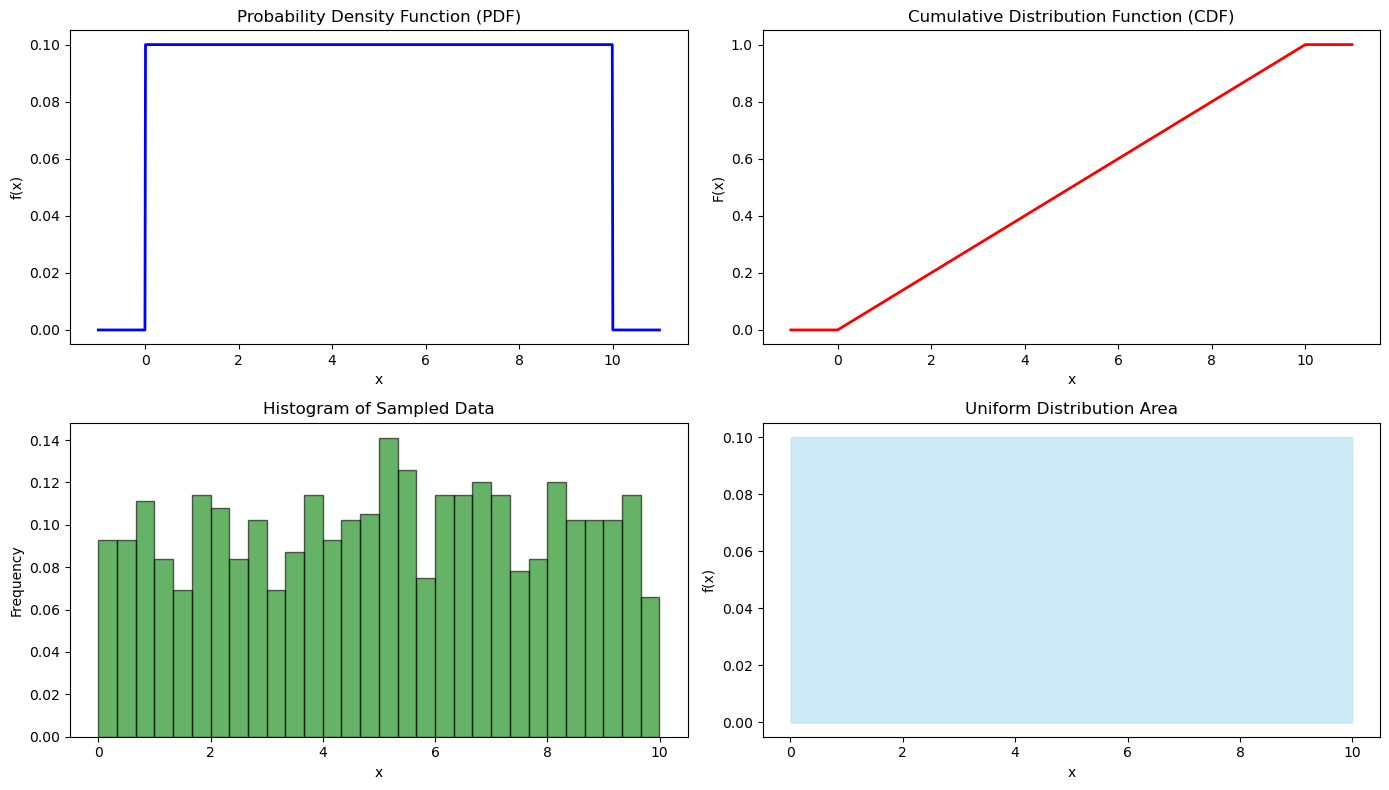

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Parameters for the uniform distribution
a = 0  # Minimum value
b = 10  # Maximum value

# Define the uniform distribution
dist = uniform(loc=a, scale=b-a)

# Define the range for plotting
x = np.linspace(a - 1, b + 1, 1000)

# Compute PDF and CDF
pdf = dist.pdf(x)
cdf = dist.cdf(x)

# Generate sample data from the uniform distribution
sample_size = 1000
samples = dist.rvs(size=sample_size)

# Plot the PDF
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(x, pdf, 'b-', lw=2)
plt.title('Probability Density Function (PDF)')
plt.xlabel('x')
plt.ylabel('f(x)')

# Plot the CDF
plt.subplot(2, 2, 2)
plt.plot(x, cdf, 'r-', lw=2)
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')

# Plot histogram of the samples
plt.subplot(2, 2, 3)
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Histogram of Sampled Data')
plt.xlabel('x')
plt.ylabel('Frequency')

# Plot uniform distribution area
plt.subplot(2, 2, 4)
plt.fill_between(x, 0, pdf, where=(x >= a) & (x <= b), color='skyblue', alpha=0.4)
plt.title('Uniform Distribution Area')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.tight_layout()
plt.show()

**Explanation:**
- Parameters: a and b are the minimum and maximum values for the uniform distribution.
- PDF and CDF: We use scipy.stats.uniform to get the PDF and CDF. loc is the start of the interval, and scale is the width of the interval.
- Sample Data: We generate 1000 samples from the uniform distribution.
- Histograms: We use plt.hist to show the distribution of the sample data.
- Visualization: The plt.fill_between function is used to show the area under the PDF between a and b.

This script provides a visual and analytical representation of a uniform distribution, its PDF, CDF, and a sample data histogram. Make sure you have numpy, matplotlib, and scipy installed (pip install numpy matplotlib scipy) to run this code successfully.

### 2. Normal Distribution

- Definition and Parameters: A normal distribution is characterized by its mean (μ) and standard deviation (σ).
- Probability Density Function (PDF): This shows the probability density of the distribution.
- Cumulative Distribution Function (CDF): This shows the probability that a value is less than or equal to a given value.
- Sample Data: Generates a sample from the normal distribution and visualizes it.
- Histogram: Shows the distribution of sampled data.

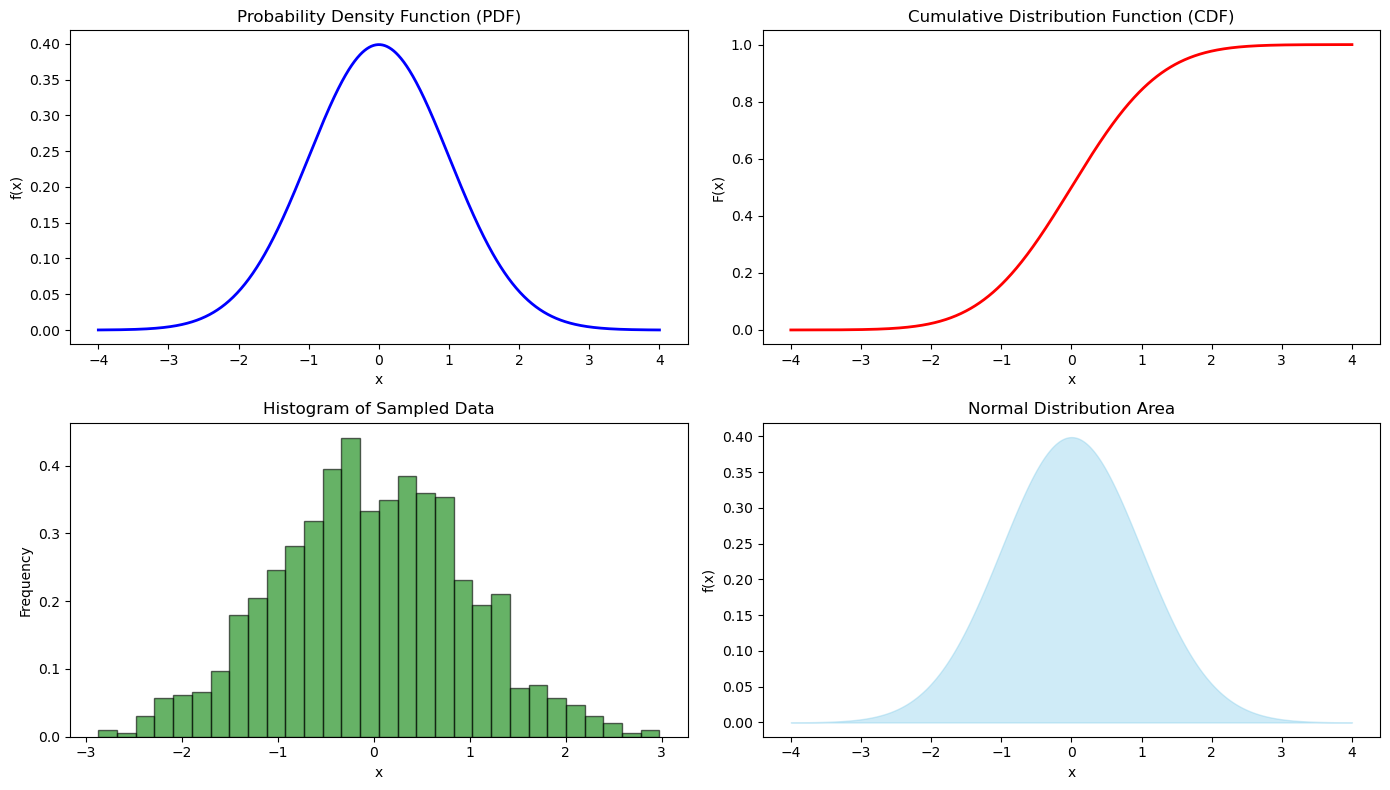

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the standard normal distribution
mu = 0      # Mean
sigma = 1   # Standard deviation

# Define the normal distribution
dist = norm(loc=mu, scale=sigma)

# Define the range for plotting
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Compute PDF and CDF
pdf = dist.pdf(x)
cdf = dist.cdf(x)

# Generate sample data from the normal distribution
sample_size = 1000
samples = dist.rvs(size=sample_size)

# Plot the PDF
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(x, pdf, 'b-', lw=2)
plt.title('Probability Density Function (PDF)')
plt.xlabel('x')
plt.ylabel('f(x)')

# Plot the CDF
plt.subplot(2, 2, 2)
plt.plot(x, cdf, 'r-', lw=2)
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')

# Plot histogram of the samples
plt.subplot(2, 2, 3)
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Histogram of Sampled Data')
plt.xlabel('x')
plt.ylabel('Frequency')

# Plot normal distribution area
plt.subplot(2, 2, 4)
plt.fill_between(x, 0, pdf, color='skyblue', alpha=0.4)
plt.title('Normal Distribution Area')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.tight_layout()
plt.show()

**Explanation:**
- Parameters: $\mu$ is the mean and $\sigma$ is the standard deviation of the normal distribution.
- PDF and CDF: We use scipy.stats.norm to calculate the PDF and CDF. loc is the mean, and scale is the standard deviation.
- Sample Data: We generate 1000 samples from the normal distribution.
- Histograms: We use plt.hist to show the distribution of the sample data.
- Visualization: The plt.fill_between function is used to show the area under the PDF curve.

To run this script successfully, ensure you have numpy, matplotlib, and scipy installed (pip install numpy matplotlib scipy). The plots will provide a comprehensive view of the normal distribution, its PDF, CDF, and a histogram of sampled data.

### Normal Distribution Extension: Confidence Intevals

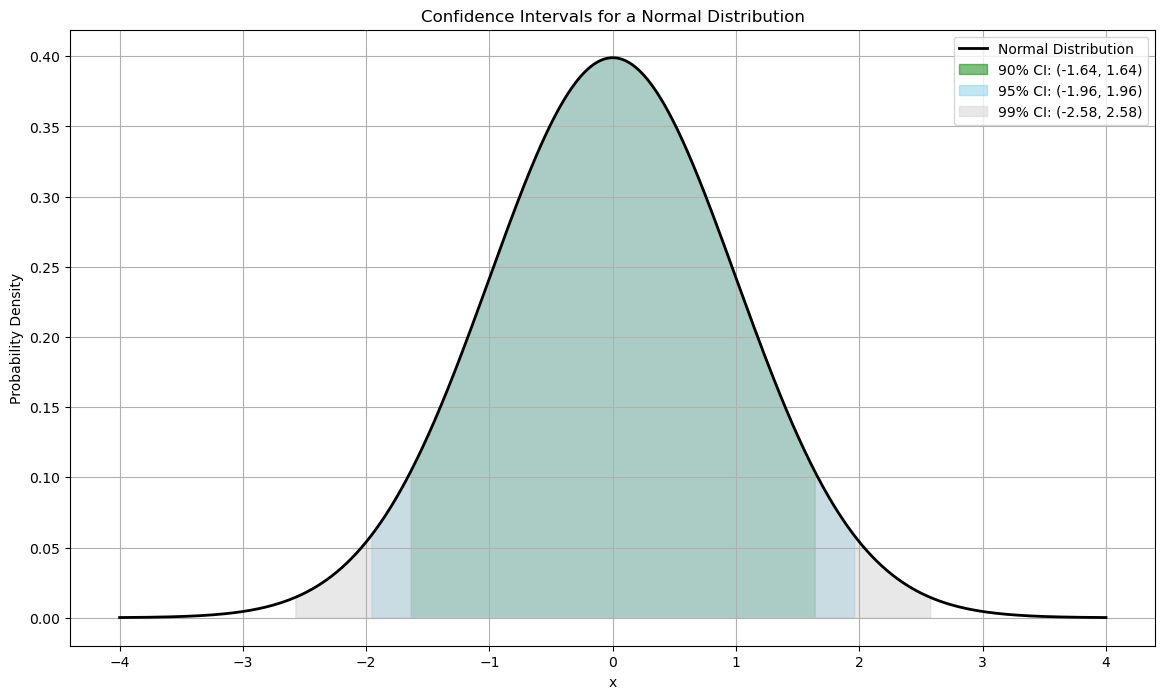

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the normal distribution
mu = 0      # Mean
sigma = 1   # Standard deviation

# Confidence levels and corresponding colors
confidence_levels = [0.90, 0.95, 0.99]
colors = ['green', 'skyblue', 'lightgrey']

# Define the range for plotting
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Compute PDF
pdf = norm.pdf(x, loc=mu, scale=sigma)

# Plot the normal distribution PDF
plt.figure(figsize=(14, 8))
plt.plot(x, pdf, 'k-', lw=2, label='Normal Distribution')

# Add confidence intervals with different colors
for confidence, color in zip(confidence_levels, colors):
    z_score = norm.ppf(1 - (1 - confidence) / 2)
    lower_bound = mu - z_score * sigma
    upper_bound = mu + z_score * sigma

    # Shade the area within the confidence interval
    plt.fill_between(x, 0, pdf, where=(x >= lower_bound) & (x <= upper_bound), 
                     color=color, alpha=0.5, 
                     label=f'{int(confidence*100)}% CI: ({lower_bound:.2f}, {upper_bound:.2f})')

# Add labels, legend, and title
plt.title('Confidence Intervals for a Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

**Explanation:**
- Parameters:
    - mu is the mean of the normal distribution.
    - sigma is the standard deviation of the normal distribution.
- Confidence Levels: confidence_levels is a list of different confidence levels (90%, 95%, 99%).
- Z-Scores: For each confidence level, calculate the corresponding z-score using norm.ppf(). The z-score represents the number of standard deviations away from the mean for the given confidence level.
- Confidence Intervals:
    - Compute the lower and upper bounds of the confidence interval for each confidence level.
    - Shade the area within these bounds on the plot using plt.fill_between(), where the alpha parameter controls the transparency of the shaded area.
- Plot:
    - Plot the PDF of the normal distribution.
    - Add shaded regions for each confidence interval, labeling them accordingly.
    - Add title, labels, legend, and grid to the plot.

This script will generate a plot showing the normal distribution with shaded areas representing different confidence intervals. Make sure you have numpy, matplotlib, and scipy installed (```pip install numpy matplotlib scipy```) to run this code successfully.